# Data loading

Mengimport data menggunakan kaggle.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          11822        349  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           3754         97  1.0              
harshsingh2209/tesla-stock-pricing-20172022                    TESLA stock pricing (2017-2022)                      28KB  2022-09-18 14:56:29            775         28  1.0              
thed

In [ ]:
!kaggle datasets download "CooperUnion/anime-recommendations-database" -p /content/sample_data --unzip

 36% 9.00M/25.0M [00:00<00:01, 11.9MB/s]
100% 25.0M/25.0M [00:00<00:00, 29.5MB/s]


# Data understanding

Terdapat 2 file yaitu :   
1. anime.csv
2. rating.csv

In [ ]:
import pandas as pd

DB_PATH="/content/sample_data"

anime = pd.read_csv(f"{DB_PATH}/anime.csv")
rating = pd.read_csv(f"{DB_PATH}/rating.csv")

print(f"Jumlah anime pada dataset : {len(anime['anime_id'].unique())}")
print(f"Jumlah users pada dataset : {len(rating['user_id'].unique())}")
print(f"Jumlah rating yang diberikan oleh user : {len(rating['user_id'].unique())}")

Jumlah anime pada dataset : 12294
Jumlah users pada dataset : 73515
Jumlah rating yang diberikan oleh user : 73515


# Univariate Exploratory Data Analysis

Variabel pada dataset anime recommendation dataset:
* anime : Merupakan informasi tentang anime
* ratings : rating yang diberikan oleh pengguna ke anime yang ditontonnya.

## Anime

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Terdapat 8 variabel pada books, 
* anime_Id : id dari sebuah anime.
* name: judul dari anime.
* genre: genre dari sebuah anime
* type: type dari anime contoh : movie,tv,dsb.
* episodes: jumlah episode.
* members: jumlah member

Melihat berapa banyak entri unik berdasarkan anime, dan seberapa banyak type dan genre pada anime.

In [ ]:
print(f"Banyak data : {len(anime['anime_id'].unique())}")
print(f"Jumlah type : {len(anime['type'].unique())}")
print(f"Jumlah genre : {len(anime['genre'].unique())}")

Banyak data : 12294
Jumlah type : 7
Jumlah genre : 3265


## Rating dan user

Melihat jumlah user

In [ ]:
print(f"Jumlah user penonton anime : {len(rating['user_id'].unique())}")

Jumlah user penonton anime : 73515


Melihat fitur pada variabel rating.

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Terdapat user_id, anime_id, dan rating sebagai fitur di vairabel rating.

Mengecek fitur null pada variabel rating

In [ ]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Melihat berapa pengguna yang memberikan rating, jumlah anime, dan jumlah rating.

In [ ]:
print('Jumlah User-ID: ', len(rating['user_id'].unique()))
print('Jumlah anime yang diberikan rating: ', len(rating['anime_id'].unique()))
print('Jumlah data rating: ', len(rating['rating']))

Jumlah User-ID:  73515
Jumlah anime yang diberikan rating:  11200
Jumlah data rating:  7813737


#Data Preprocessing

## Menggabungkan seluruh anime

Mengidentifikasi berapa jumlah seluruh anime pada dataset.

In [ ]:
import numpy as np

In [ ]:
anime_all = np.concatenate((
    anime['anime_id'].unique(),
    rating['anime_id'].unique(),
))

anime_all = np.sort(np.unique(anime_all))

print(f"Jumlah seluruh anime: {len(anime_all)}")

Jumlah seluruh anime: 12297


Kita memiliki 73515 data pengguna dari 12297 anime yang memiliki ratings.

## Menggabungkan Data dengan Fitur judul anime

In [ ]:
all_anime_rate= rating
all_anime_rate

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [ ]:
all_anime_title=pd.merge(all_anime_rate,anime[['anime_id','name']],on="anime_id",how="left")
all_anime_title

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season
...,...,...,...,...
7813732,73515,16512,7,Devil Survivor 2 The Animation
7813733,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain
7813734,73515,22145,10,Kuroshitsuji: Book of Circus
7813735,73516,790,9,Ergo Proxy


## Menggabungkan Data dengan Fitur type anime

In [ ]:
all_anime_type=pd.merge(all_anime_title,anime[['anime_id','type']],on="anime_id",how="left")
all_anime_type

,user_id,anime_id,rating,name,type
0,1,20,-1,Naruto,TV
1,1,24,-1,School Rumble,TV
2,1,79,-1,Shuffle!,TV
3,1,226,-1,Elfen Lied,TV
4,1,241,-1,Girls Bravo: First Season,TV
...,...,...,...,...,...
7813732,73515,16512,7,Devil Survivor 2 The Animation,TV
7813733,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,Movie
7813734,73515,22145,10,Kuroshitsuji: Book of Circus,TV
7813735,73516,790,9,Ergo Proxy,TV


## Menggabungkan Data dengan Fitur genre anime

In [ ]:
all_anime=pd.merge(all_anime_type,anime[['anime_id','genre']],on="anime_id",how="left")
all_anime

,user_id,anime_id,rating,name,type,genre
0,1,20,-1,Naruto,TV,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,1,24,-1,School Rumble,TV,"Comedy, Romance, School, Shounen"
2,1,79,-1,Shuffle!,TV,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R..."
3,1,226,-1,Elfen Lied,TV,"Action, Drama, Horror, Psychological, Romance,..."
4,1,241,-1,Girls Bravo: First Season,TV,"Comedy, Ecchi, Fantasy, Harem, Romance, School"
...,...,...,...,...,...,...
7813732,73515,16512,7,Devil Survivor 2 The Animation,TV,"Action, Demons, Supernatural"
7813733,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,Movie,"Mecha, Police, Psychological, Sci-Fi"
7813734,73515,22145,10,Kuroshitsuji: Book of Circus,TV,"Comedy, Demons, Fantasy, Historical, Shounen, ..."
7813735,73516,790,9,Ergo Proxy,TV,"Mystery, Psychological, Sci-Fi"


# Data Preparation

## Mengatasi missing value

In [ ]:
all_anime.isnull().sum()	

user_id       0
anime_id      0
rating        0
name         10
type         14
genre       120
dtype: int64

terdapat missing value pada judul anime, type anime dan genre anime. jumlah yang cukup banyak, tapi kalau menghapusnya kita masih punya banyak data yang tersisa.

In [ ]:
all_anime_clean = all_anime.dropna()

In [ ]:
all_anime_clean.isnull().sum()

user_id     0
anime_id    0
rating      0
name        0
type        0
genre       0
dtype: int64

In [ ]:
print(f"Jumlah data anime yang tersisa: {len(all_anime_clean['anime_id'].unique())}")
print(f'Jumlah data user yang tersisa: {len(all_anime_clean["user_id"].unique())}')

Jumlah data anime yang tersisa: 11164
Jumlah data user yang tersisa: 73515


## Menghapus data duplikat

In [ ]:
preparation = all_anime_clean.drop_duplicates('anime_id')

In [ ]:
preparation.sort_values('anime_id')

,user_id,anime_id,rating,name,type,genre
1304,13,1,-1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1305,13,5,-1,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space"
250,4,6,-1,Trigun,TV,"Action, Comedy, Sci-Fi"
5165,54,7,-1,Witch Hunter Robin,TV,"Action, Drama, Magic, Mystery, Police, Superna..."
25854,296,8,7,Beet the Vandel Buster,TV,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...,...,...
3316425,30565,34367,6,Long Riders Recap,Special,"Comedy, Shounen, Slice of Life, Sports"
7703451,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music
1456909,13954,34475,6,Monster Strike: Rain of Memories,ONA,"Action, Fantasy, Game"
5106536,48766,34476,-1,Platonic Chain: Ansatsu Jikkouchuu,Special,"Sci-Fi, Slice of Life"


## Konversi data series menjadi list

In [ ]:
anime_id = preparation['anime_id'].tolist()
 
anime_title = preparation['name'].tolist()
 
# anime_type = preparation['type'].tolist()

anime_genre = preparation['genre'].tolist()
 
print(len(anime_id))
print(len(anime_title))
# print(len(anime_type))
print(len(anime_genre))

11164
11164
11164


membuat dictionary untuk menentukan pasangan key-value pada data anime_id, anime_title, anime_type, anime_genre yang telah di siapkan sebelumnya.

In [ ]:
anime_new = pd.DataFrame({
    "anime_id":anime_id,
    "title":anime_title,
    # "type":anime_type,
    "genre":anime_genre
})

anime_new

,anime_id,title,genre
0,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,24,School Rumble,"Comedy, Romance, School, Shounen"
2,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R..."
3,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,..."
4,241,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School"
...,...,...,...
11159,30450,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen"
11160,33484,Shiroi Zou,"Action, Historical, Kids"
11161,29481,Kakinoki Mokkii,"Fantasy, Kids"
11162,34412,Hashiri Hajimeta bakari no Kimi ni,Music


# Modeling and Result

## Content based filtering

In [ ]:
data = anime_new
data.sample(5)

,anime_id,title,genre
3912,1241,Mobile Suit Gundam Seed Destiny Final Plus: Th...,"Drama, Mecha, Military, Sci-Fi, Space"
10221,13435,Taka no Tsume NEO Announcement Movie,"Comedy, Parody, Super Power"
1534,18195,Little Busters!: Refrain,"Comedy, Drama, Romance, School, Slice of Life,..."
4242,32574,Kekkai Sensen: Ousama no Restaurant no Ousama,"Action, Fantasy, Shounen, Super Power, Superna..."
1171,21421,Mahou Shoujo Taisen,Magic


In [ ]:
genre_anime = data["genre"].str.split(", | , | ,").astype(str)

### TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(token_pattern=r"\w{1,}")
tf_idf.fit(genre_anime)
tf_idf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

In [ ]:
tfidf_matrix = tf_idf.fit_transform(genre_anime)

tfidf_matrix.shape

(11164, 47)

In [ ]:
tfidf_matrix.todense()

matrix([[0.24189974, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.64074705, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf_idf.get_feature_names(),
    index=data.title
).sample(10, axis=1).sample(100, axis=0)

,seinen,comedy,action,parody,ai,mystery,police,martial,thriller,mecha
title,,,,,,,,,,
Robot Girls Z,0.0,0.329861,0.000000,0.737024,0.0,0.000000,0.0,0.0,0.000000,0.589905
Famiresu Senshi Purin,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Romeo no Aoi Sora Specials,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Ashinaga Ojisan,0.0,0.379272,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Big Order (TV),0.0,0.000000,0.341864,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
Pretty Rhythm Movie: All Star Selection - Prism Show☆Best Ten,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Jeonja Ingan 337,0.0,0.000000,0.321505,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Komatsu Sakyo Anime Gekijou,0.0,0.258522,0.000000,0.577628,0.0,0.000000,0.0,0.0,0.000000,0.000000


### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.21344213, 0.03728032, ..., 0.        , 0.        ,
        0.        ],
       [0.21344213, 1.        , 0.41044044, ..., 0.        , 0.        ,
        0.        ],
       [0.03728032, 0.41044044, 1.        , ..., 0.16761459, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.16761459, ..., 1.        , 0.        ,
        0.58559766],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.58559766, 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (11164, 11164)


title,Mobile Suit Gundam Seed Destiny,Princess Knight☆Catue,Onegai☆Twins,Tekken: Blood Vengeance,Jokei Kazoku III: Himitsu - The Anime
title,,,,,
Dr. Slump Movie 04: Arale-chan Hoyoyo! Nanaba Shiro no Hihou,0.304568,0.0,0.471165,0.308562,0.0
Inu to Hasami wa Tsukaiyou,0.000000,0.0,0.126792,0.323046,0.0
Bakuhatsu Gorou,0.000000,0.0,0.110906,0.000000,0.0
Manga Nihon Emaki,0.000000,0.0,0.000000,0.000000,0.0
Takoyaki Mant-Man,0.365996,0.0,0.566195,0.370796,0.0
Jigoku Sensei Nube,0.118320,0.0,0.227190,0.152002,0.0
Imouto Twins,0.000000,1.0,0.000000,0.000000,1.0
Joker: Marginal City,0.584105,0.0,0.354774,0.407713,0.0
Shoujo Kakumei Utena,0.112756,0.0,0.138638,0.104146,0.0


### Mendapatkan Rekomendasi

In [ ]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['title', 'genre']], k=5):
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_anime, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data[data.title.eq('One Punch Man')]

,anime_id,title,genre
227,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ..."


In [ ]:
anime_recommendations('One Punch Man')

,title,genre
0,One Punch Man: Road to Hero,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ..."
1,One Punch Man Specials,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ..."
2,Tentai Senshi Sunred,"Comedy, Parody, Seinen, Super Power"
3,Tentai Senshi Sunred: Short Corner,"Comedy, Parody, Seinen, Super Power"
4,Gungrave,"Action, Drama, Sci-Fi, Seinen, Super Power"


## Collaborative Filtering

### Data Understanding

import libary yang dibutuhkan untuk model collaborative filtering

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

membaca dataset rating

In [ ]:
df = rating
df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


terdapat dataset dengan nilai -1

In [ ]:
df.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

### Data Preparation

ubah nilai -1 menjadi 0.

In [ ]:
df[df['rating']==-1]

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813628,73515,2385,-1
7813629,73515,2386,-1
7813631,73515,2490,-1
7813635,73515,2680,-1


In [ ]:
fix_df = df.replace(-1,0)
fix_df[fix_df['rating']==-1]

,user_id,anime_id,rating


encode fitur user_id dan anime_id.

In [ ]:
user_ids = fix_df['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
anime_ids = fix_df['anime_id'].unique().tolist()

anime_id_to_anime_id_encoded = {x: i for i, x in enumerate(anime_ids)}

anime_id_encoded_to_anime_id = {i: x for i, x in enumerate(anime_ids)}

In [ ]:
fix_df['user'] = fix_df['user_id'].map(user_to_user_encoded)
fix_df['anime'] = fix_df['anime_id'].map(anime_id_to_anime_id_encoded)

In [ ]:
num_user = len(user_to_user_encoded)
print(num_user)

num_anime = len(anime_id_encoded_to_anime_id)
print(num_anime)

fix_df['rating'] = fix_df['rating'].values.astype(np.float32)

min_rating = min(fix_df['rating'])

max_rating = max(fix_df['rating'])

print(f'Number of User: {num_user}, Number of anime: {num_anime}, Min Rating: {min_rating}, Max Rating: {max_rating}')

73515
11200
Number of User: 73515, Number of anime: 11200, Min Rating: 0.0, Max Rating: 10.0


### Membagi data train dan test

In [ ]:
fix_df = fix_df.sample(frac=1,random_state=42)
fix_df

,user_id,anime_id,rating,user,anime
7806172,73424,7785,10.0,73422,1067
6470262,59789,19769,6.0,59787,256
5975474,55960,59,10.0,55958,603
7617688,71461,3342,10.0,71459,1361
5932334,55390,986,8.0,55388,1408
...,...,...,...,...,...
6550634,60487,6880,7.0,60485,185
7705870,72443,13469,0.0,72441,1102
6423388,59483,490,8.0,59481,3659
6962611,65007,4224,7.0,65005,22


In [ ]:
x = fix_df[['user','anime']].values

y = fix_df['rating'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8*df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[73422  1067]
 [59787   256]
 [55958   603]
 ...
 [59481  3659]
 [65005    22]
 [59404     0]] [1.  0.6 1.  ... 0.8 0.7 0.8]


### Training

In [ ]:
class RecommenderNet(tf.keras.Model):
  def __init__(self,num_user,num_anime,embedding_size,**kwargs):
    super(RecommenderNet,self).__init__(**kwargs)
    self.num_user = num_user
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_user,
        embedding_size,
        embeddings_initializer= 'he_normal',
        embeddings_regularizer= keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_user,1)
    self.anime_embedding=layers.Embedding(
        num_anime,
        embedding_size,
        embeddings_initializer= 'he_normal',
        embeddings_regularizer= keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime,1)

  def call(self,inputs):
    user_vector = self.user_embedding(inputs[:,0]) #Embedding layer 1
    user_bias = self.user_bias(inputs[:,0])#Layer 2
    anime_vector = self.anime_embedding(inputs[:,1]) #Layer 3
    anime_bias = self.anime_bias(inputs[:,1]) # Layer 4

    dot_user_anime = tf.tensordot(user_vector,anime_vector,2)

    x = dot_user_anime+user_bias+anime_bias
    return tf.nn.sigmoid(x) # Aktivasi sigmoid

In [ ]:
model = RecommenderNet(num_user,num_anime,50) #inisialisasi model

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.optimizers.SGD(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_val,y_val)
)

Epoch 1/5
48836/48836 [==============================] - 224s 4ms/step - loss: 0.6928 - root_mean_squared_error: 0.3620 - val_loss: 0.6920 - val_root_mean_squared_error: 0.3612
Epoch 2/5
48836/48836 [==============================] - 218s 4ms/step - loss: 0.6911 - root_mean_squared_error: 0.3608 - val_loss: 0.6904 - val_root_mean_squared_error: 0.3601
Epoch 3/5
48836/48836 [==============================] - 232s 5ms/step - loss: 0.6895 - root_mean_squared_error: 0.3597 - val_loss: 0.6888 - val_root_mean_squared_error: 0.3590
Epoch 4/5
48836/48836 [==============================] - 216s 4ms/step - loss: 0.6880 - root_mean_squared_error: 0.3587 - val_loss: 0.6874 - val_root_mean_squared_error: 0.3580
Epoch 5/5
48836/48836 [==============================] - 233s 5ms/step - loss: 0.6866 - root_mean_squared_error: 0.3577 - val_loss: 0.6860 - val_root_mean_squared_error: 0.3570


### Visualisasi Metrik

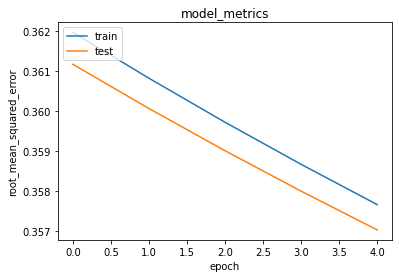

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Mendapatkan Rekomendasi Resto

In [ ]:
anime_df = anime_new
df = pd.read_csv('sample_data/rating.csv')
 
user_id = df.user_id.sample(1).iloc[0]
anime_watched_by_user = df[df.user_id == user_id]
 
anime_not_watched = anime_df[~anime_df['anime_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id'] 
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_id_encoded_to_anime_id.keys()))
)
 
anime_not_watched = [[anime_id_encoded_to_anime_id.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

In [ ]:
ratings = model.predict(user_anime_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_id_encoded_to_anime_id.get(anime_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('anime with high ratings from user')
print('----' * 8)
 
top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
anime_df_rows = anime_df[anime_df['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.title, ':', row.genre)
 
print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)
 
recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.title, ':', row.genre)

Showing recommendations for users: 5829
anime with high ratings from user
--------------------------------
Solty Rei : Action, Sci-Fi, Super Power
Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu : Action, Comedy, Shounen, Super Power, Supernatural
Skip Beat! : Comedy, Drama, Romance, Shoujo
Witch Hunter Robin : Action, Drama, Magic, Mystery, Police, Supernatural
Eureka Seven: Pocket ga Niji de Ippai : Adventure, Mecha, Romance, Sci-Fi
--------------------------------
Top 10 anime recommendation
--------------------------------
Darker than Black: Kuro no Keiyakusha : Action, Mystery, Sci-Fi, Super Power
Toradora! : Comedy, Romance, School, Slice of Life
Shingeki no Kyojin : Action, Drama, Fantasy, Shounen, Super Power
Sen to Chihiro no Kamikakushi : Adventure, Drama, Supernatural
Fullmetal Alchemist: Brotherhood : Action, Adventure, Drama, Fantasy, Magic, Military, Shounen
Fullmetal Alchemist : Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen
Steins;Gate : Sci-Fi, 

### Evaluasi

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

data = {
    "train":sqrt(mean_squared_error(y_train, model.predict(x_train).flatten())),
    "test":sqrt(mean_squared_error(y_val, model.predict(x_val).flatten()))
}

rmse = pd.DataFrame(data=data, index=['Collaborative filtering'])
rmse

,train,test
Collaborative filtering,0.357208,0.357012


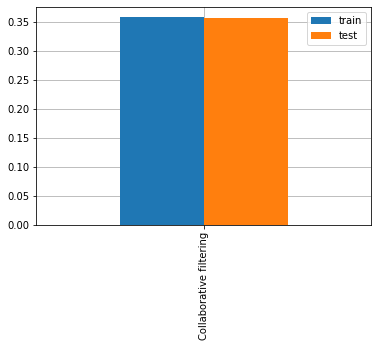

In [ ]:
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='bar', ax=ax, zorder=3)
ax.grid(zorder=0)